<a href="https://colab.research.google.com/github/IrfanPavel/CNN-and-Computer-Vision-with-Tensorflow/blob/main/CNN_and_Computer_Vision_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-02-05 18:22:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 172.253.123.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   203MB/s    in 0.5s    

2022-02-05 18:22:20 (203 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [40]:
!ls pizza_steak

test  train


In [41]:
!ls pizza_steak/train/

pizza  steak


In [42]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [43]:
#walk through pizza_steak directory and list number of files

import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print("There are {} directories and {} images in {}".format(len(dirnames),len(filenames),dirpath))

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class

  random_image=random.sample(os.listdir(target_folder),1)

  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print("Image shape: {}".format(img.shape))

  return img

Image shape: (512, 512, 3)


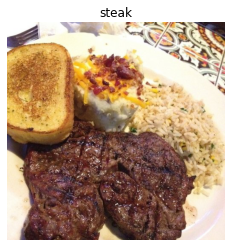

In [45]:
#View a random image from the training dataset

img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="steak")

Image shape: (384, 512, 3)


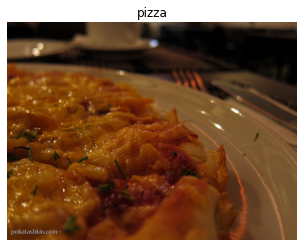

In [46]:
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")

In [47]:
img

array([[[ 42,  25,  17],
        [ 41,  24,  16],
        [ 40,  23,  15],
        ...,
        [108,  78,  52],
        [107,  77,  53],
        [109,  79,  55]],

       [[ 40,  23,  16],
        [ 40,  23,  16],
        [ 39,  22,  15],
        ...,
        [109,  78,  49],
        [109,  78,  50],
        [111,  79,  54]],

       [[ 36,  21,  14],
        [ 36,  21,  14],
        [ 35,  20,  13],
        ...,
        [109,  78,  47],
        [108,  77,  48],
        [110,  79,  50]],

       ...,

       [[ 91,  41,   8],
        [ 90,  40,   7],
        [ 90,  40,   7],
        ...,
        [117,  85,  46],
        [116,  84,  45],
        [115,  83,  44]],

       [[ 90,  40,   7],
        [ 90,  40,   7],
        [ 90,  40,   7],
        ...,
        [118,  86,  47],
        [118,  86,  47],
        [117,  85,  46]],

       [[ 90,  40,   7],
        [ 90,  40,   7],
        [ 90,  40,   7],
        ...,
        [118,  86,  47],
        [118,  86,  47],
        [116,  84,  45]]

In [ ]:
#Get all the pixels values between 0 and 1

img/255

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#Preprocess data(Normalization/scaling)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#Setup our train and test directories
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

#setup data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,#number of images to precess at a time
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
#Create a CNN Model
model_1=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid") # binary activation output
])
#Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1=model_1.fit(train_data,
                        epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-79b1a43d0fd1>", line 50, in <module>
    validation_steps=len(valid_data))
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1216, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 910, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 975, in _call
    return self._stateles

KeyboardInterrupt: ignored

In [ ]:
model_1.summary()

NameError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)

#create a model

model_2=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(224,224,3)),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid")
])


#Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit The model
history_2=model_2.fit(train_data,
                      epochs=20,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

NameError: ignored

# **Adding more layers**

In [ ]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
                             
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_3=model_3.fit(train_data,
                      epochs=20,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

NameError: ignored

In [ ]:
model_3.summary()

# **Importing Dataset**

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-02-02 16:46:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  90.6MB/s    in 1.2s    

2022-02-02 16:46:56 (90.6 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



NameError: ignored

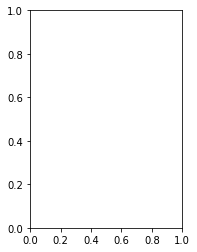

In [ ]:
#Visualize data 
import matplotlib.pyplot as plt
plt.figure()

plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")


# **2.Preprocess the data**

In [ ]:
#define the training and test directory paths

train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

A batch is a small subset of the dataset a model looks at during training.

In [ ]:
#create train and test data genrators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
#Turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=train_data.next()

len(images),len(labels)

(32, 32)

In [ ]:
#Get the first two images
images[:2]

array([[[[0.3647059 , 0.2627451 , 0.20392159],
         [0.34901962, 0.24705884, 0.18823531],
         [0.3529412 , 0.24705884, 0.18039216],
         ...,
         [0.0627451 , 0.05882353, 0.0509804 ],
         [0.0509804 , 0.03529412, 0.03137255],
         [0.04313726, 0.02352941, 0.01176471]],

        [[0.34901962, 0.2392157 , 0.19215688],
         [0.36862746, 0.25882354, 0.21176472],
         [0.36862746, 0.25490198, 0.20000002],
         ...,
         [0.0509804 , 0.03529412, 0.03137255],
         [0.04313726, 0.02745098, 0.01568628],
         [0.05882353, 0.04313726, 0.03137255]],

        [[0.29803923, 0.19215688, 0.15686275],
         [0.36078432, 0.2509804 , 0.20784315],
         [0.35686275, 0.2392157 , 0.19607845],
         ...,
         [0.06666667, 0.04705883, 0.03529412],
         [0.04705883, 0.03137255, 0.01960784],
         [0.06666667, 0.05490196, 0.03529412]],

        ...,

        [[0.13333334, 0.14117648, 0.12941177],
         [0.10196079, 0.10980393, 0.09019608]

In [ ]:
images[0].shape

(224, 224, 3)

# **3.Create A Model (Start with a baseline)**

In [ ]:
#Make the creating of our model a little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

#Create The Model(3 layer Convolutional Neural Network (baseline))

model_4=Sequential([
                    Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding="valid",
                           activation="relu",
                           input_shape=(224,224,3)),#input layer(specify input shape)
                    Conv2D(10,3,activation="relu"),
                    Conv2D(10,3,activation="relu"),
                    Flatten(),
                    Dense(1,activation="sigmoid") #Output layer(specify input shape)


                
])

2D:Our inputs are two dimensional(height and width)

Filters:These are the number of "Feature extractors" that will be moving over our images

kernel_size:The size of our filters.Kernel size 3 means each filter will have the size of 3×3 ,meaning it will look at a sapce of 3×3 pixels each time.The smaller the kernel,the more fine grained features it will extract.

strides:The number of pixels a filter will move across as it covers the image.A stride of 1 means the filter moves across each pixel 1 by 1.A stride of 2 means it 2 pixels at a time

padding: This can be either "same" or "valid". "same" adds zeros to outside of the image so the resulting output of the Convolutional layer is the same as the input,where as "valid" cuts of excess pixels where the filter doesn't fit pixels wide divided by a kernel size of 3 (A single pixel will cut off the end)


---



In [ ]:
#Compile the Model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
#Fit The Model
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))


# steps per epoch: This is the number of batches a model will go through per epoch.

# validation_steps: Same as above,(500 test images in batches of 32= 500/32)

Epoch 1/5
47/47 [==============================] - 119s 2s/step - loss: 0.7336 - accuracy: 0.6993 - val_loss: 0.3866 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 109s 2s/step - loss: 0.3958 - accuracy: 0.8333 - val_loss: 0.3615 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 108s 2s/step - loss: 0.2653 - accuracy: 0.8967 - val_loss: 0.5532 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 107s 2s/step - loss: 0.1336 - accuracy: 0.9633 - val_loss: 0.4520 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 113s 2s/step - loss: 0.0615 - accuracy: 0.9840 - val_loss: 0.4662 - val_accuracy: 0.8180


# **5.Evaluate a model**

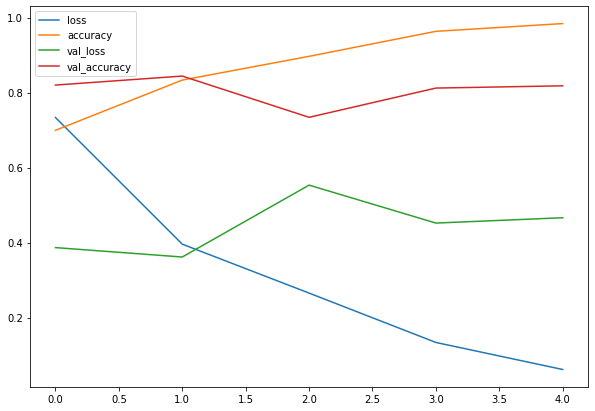

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

#Model's validations loss starts to increase,it's overfitting the training dataset.This means it's learning the patterns in the training 
#dataset too well and it's ability to generalize to unseen data will be diminished.

In [12]:
#Plot the validaton and Training data Separately

def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  #Plot loss

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();
  

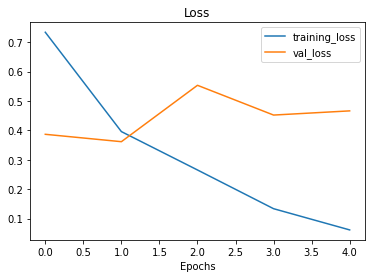

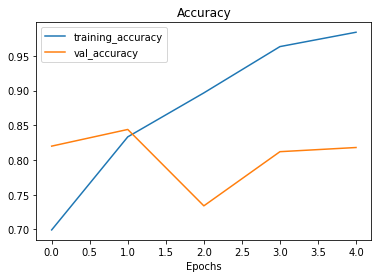

In [ ]:
plot_loss_curves(history_4)

# **6.Adjust The Model Parameters**

.Get More data:

.Simplify Model:

.Use Data Augmentation: If a model is able to learn patterns in augmented data,
the model may be able to generalize better to unseen/test data

.Use Transfer Learning

In [ ]:
#Try with a simplified model]
import tensorflow as tf

model_5=Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2), #reduce the number of features by half
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 49s 1s/step - loss: 0.6135 - accuracy: 0.6640 - val_loss: 0.4499 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 48s 1s/step - loss: 0.4537 - accuracy: 0.8013 - val_loss: 0.3631 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 51s 1s/step - loss: 0.4178 - accuracy: 0.8080 - val_loss: 0.3515 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 48s 1s/step - loss: 0.3972 - accuracy: 0.8287 - val_loss: 0.3248 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 48s 1s/step - loss: 0.3611 - accuracy: 0.8387 - val_loss: 0.3072 - val_accuracy: 0.8860


In [ ]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

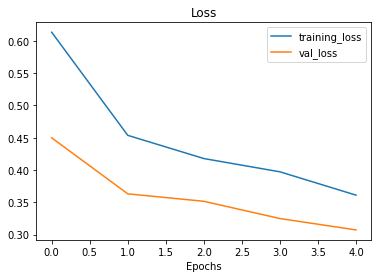

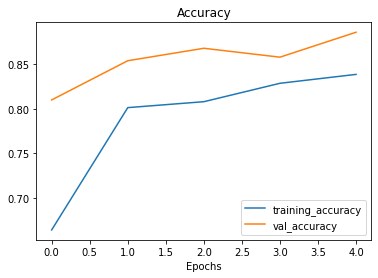

In [ ]:
plot_loss_curves(history_5)

# **Let's Try another method of overfitting Prevention,Data Augmentation**

In [ ]:
#Create ImageDataGenerator training instance with Data Augmentation

train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True
                                           )

train_datagen=ImageDataGenerator(rescale=1/255.)

test_datagen=ImageDataGenerator(rescale=1/255.)

# Data Augmentation:It's the process of altering our training data,leading to it having more diversity and in turn allowing our models to learn more generalizable patterns.Altering might mean adjusting the rotation of an image,flipping it ,cropping it or something similiar.

In [ ]:
#Import data and augment it from training directory
print("Augmented Training Images:")

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False)

#Create non-augmented data batches

print("Non-augmented training images:")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

print("Unchanged test images:")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary"
                                           )

Augmented Training Images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
#Get data batch samples
images,labels=train_data.next()
augmented_images,augmented_labels=train_data_augmented.next()

In [ ]:
#Show originial image and augmented image
random_number=random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

NameError: ignored

# **We've got augmented data,let's try and refit a model on it and let's see how it affects training**

In [ ]:
#Try with a simplified model]
import tensorflow as tf

model_6=Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2), #reduce the number of features by half
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_6)

# **Let's shuffle the augmented training data**

In [ ]:

train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=True)


Found 1500 images belonging to 2 classes.


In [ ]:
#Try with a simplified model]
import tensorflow as tf

model_7=Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2), #reduce the number of features by half
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

history_7=model_7.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 76s 2s/step - loss: 0.6640 - accuracy: 0.5893 - val_loss: 0.6387 - val_accuracy: 0.6080
Epoch 2/5
47/47 [==============================] - 64s 1s/step - loss: 0.6079 - accuracy: 0.6593 - val_loss: 0.5749 - val_accuracy: 0.6780
Epoch 3/5
47/47 [==============================] - 62s 1s/step - loss: 0.5528 - accuracy: 0.7100 - val_loss: 0.5533 - val_accuracy: 0.7020
Epoch 4/5
47/47 [==============================] - 62s 1s/step - loss: 0.5161 - accuracy: 0.7400 - val_loss: 0.4089 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 61s 1s/step - loss: 0.4990 - accuracy: 0.7653 - val_loss: 0.4553 - val_accuracy: 0.7940


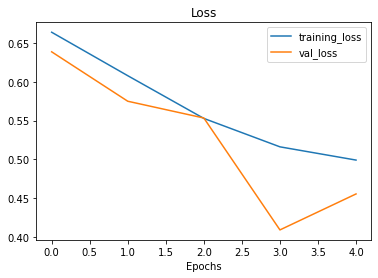

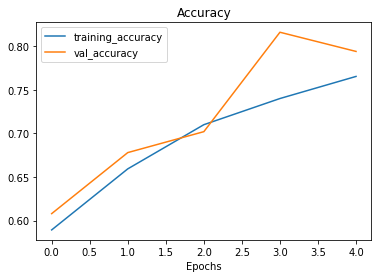

In [ ]:
plot_loss_curves(history_7)

# **7.Repeat until Satisfied**

We stil could try to continue to improve our model:

.Increase the number of model layers

.Increase the number of filters in each covolutional layer(ex: from 10 32,54,128)

.train for longer(more epochs)

.Finding an ideal learning rate

.Get more data

.Use Transfer Learning

In [ ]:
model_8=Sequential([
                    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(1,activation="sigmoid")
                    

])

#Compile The Model

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_8=model_8.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 109s 2s/step - loss: 0.6680 - accuracy: 0.5947 - val_loss: 0.5516 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 108s 2s/step - loss: 0.5577 - accuracy: 0.7233 - val_loss: 0.4102 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 114s 2s/step - loss: 0.4875 - accuracy: 0.7673 - val_loss: 0.3539 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 108s 2s/step - loss: 0.4658 - accuracy: 0.7980 - val_loss: 0.3504 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 108s 2s/step - loss: 0.4695 - accuracy: 0.7747 - val_loss: 0.3616 - val_accuracy: 0.8780


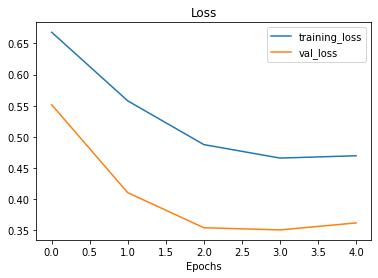

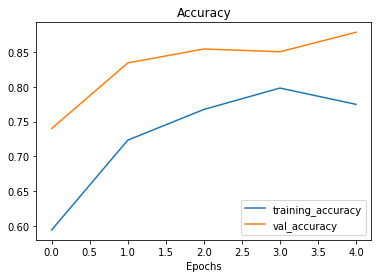

In [ ]:
plot_loss_curves(history_8)

# **Multi-Class Classification**

# **1.Import and become one with the data**

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 


zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-02-05 16:15:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.213.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   200MB/s    in 2.5s    

2022-02-05 16:15:58 (200 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print("There are {} directories and {} images in {}".format(len(dirnames),len(filenames),dirpath))

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 10 directories and 0 imag

In [3]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

# **Get The class names from the subdirectories**

In [4]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class

  random_image=random.sample(os.listdir(target_folder),1)

  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print("Image shape: {}".format(img.shape))

  return img

Image shape: (512, 511, 3)


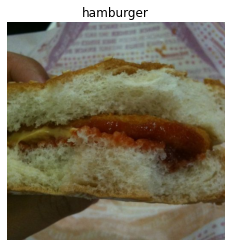

In [7]:
#View a random image from the training dataset

import random
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))

# **2.Preprocess The Data(Prepare it for the model)**

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Rescale the data # create generator instances

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

#Load data in from directories and turn it into batches

train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")
test_data=train_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# **3.Create A Model(Start with a baseline)**

# **4.Fit a Model**

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense


#Create model

model_9=Sequential([
                    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    Conv2D(10,3,activation="relu"),
                    Flatten(),
                    Dense(10,activation="softmax")

])

#cOMPILE The Model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_9=model_9.fit(train_data,
                      epochs=5
                      ,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 509s 2s/step - loss: 2.1464 - accuracy: 0.2257 - val_loss: 2.0007 - val_accuracy: 0.2892
Epoch 2/5
235/235 [==============================] - 487s 2s/step - loss: 1.8149 - accuracy: 0.3769 - val_loss: 2.0022 - val_accuracy: 0.3116
Epoch 3/5
235/235 [==============================] - 488s 2s/step - loss: 1.2482 - accuracy: 0.5981 - val_loss: 2.0661 - val_accuracy: 0.2988
Epoch 4/5
235/235 [==============================] - 491s 2s/step - loss: 0.3080 - accuracy: 0.9135 - val_loss: 3.1126 - val_accuracy: 0.2832
Epoch 5/5
235/235 [==============================] - 497s 2s/step - loss: 0.0389 - accuracy: 0.9924 - val_loss: 4.1006 - val_accuracy: 0.2744


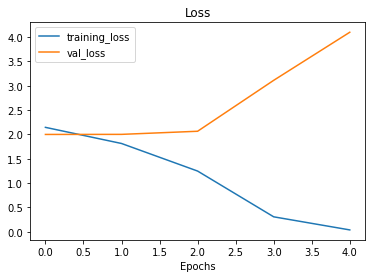

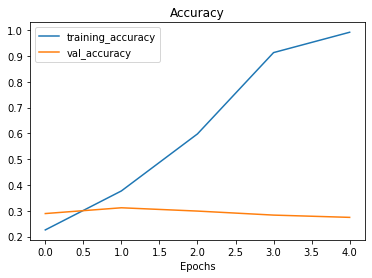

In [13]:
plot_loss_curves(history_9)

# **Simplify Model**

In [14]:
model_10=Sequential([
                    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    Flatten(),
                    Dense(10,activation="softmax")

])

#cOMPILE The Model
model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10=model_10.fit(train_data,
                      epochs=5
                      ,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 239s 1s/step - loss: 2.5592 - accuracy: 0.1255 - val_loss: 2.1135 - val_accuracy: 0.2152
Epoch 2/5
235/235 [==============================] - 240s 1s/step - loss: 1.9858 - accuracy: 0.3063 - val_loss: 2.0822 - val_accuracy: 0.2460
Epoch 3/5
235/235 [==============================] - 238s 1s/step - loss: 1.6229 - accuracy: 0.4645 - val_loss: 2.2163 - val_accuracy: 0.2564
Epoch 4/5
235/235 [==============================] - 237s 1s/step - loss: 1.0503 - accuracy: 0.6784 - val_loss: 2.4693 - val_accuracy: 0.2328
Epoch 5/5
235/235 [==============================] - 240s 1s/step - loss: 0.4676 - accuracy: 0.8737 - val_loss: 3.0347 - val_accuracy: 0.2264


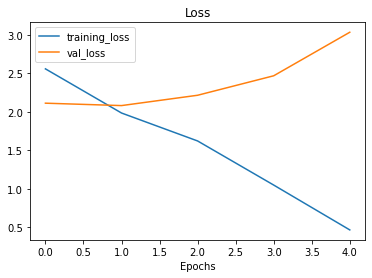

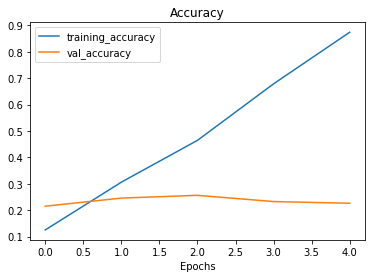

In [15]:
plot_loss_curves(history_10)

# **Data Augmentation**

In [16]:
#Create augmented data generator instance
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [17]:
model_11=tf.keras.models.clone_model(model_10)

model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_11=model_11.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 330s 1s/step - loss: 2.6847 - accuracy: 0.1701 - val_loss: 2.1020 - val_accuracy: 0.2404
Epoch 2/5
235/235 [==============================] - 367s 2s/step - loss: 2.1197 - accuracy: 0.2463 - val_loss: 2.0061 - val_accuracy: 0.3004
Epoch 3/5
235/235 [==============================] - 436s 2s/step - loss: 2.0866 - accuracy: 0.2557 - val_loss: 1.9477 - val_accuracy: 0.3204
Epoch 4/5
235/235 [==============================] - 321s 1s/step - loss: 2.0501 - accuracy: 0.2744 - val_loss: 1.9517 - val_accuracy: 0.3084
Epoch 5/5
235/235 [==============================] - 326s 1s/step - loss: 2.0270 - accuracy: 0.2875 - val_loss: 1.9508 - val_accuracy: 0.3036


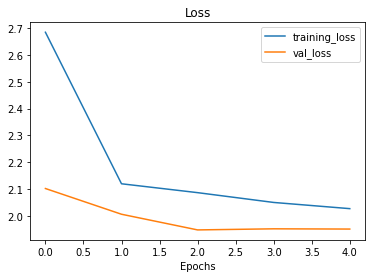

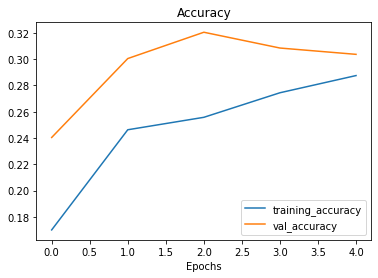

In [21]:
plot_loss_curves(history_11)

In [22]:
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [53]:
def load_and_prep_image(filename,img_shape=224):
  #Read the target file
  img=tf.io.read_file(filename)


  #Decode the read file into a tensor & ensure 3 colour channels

  img=tf.image.decode_image(img,channels=3)

  img=tf.img.resize(img,size=[img_shape,img_shape])

  img=img/255.
  return img

In [54]:
def pred_and_plot(model,filename,class_names):
  img=load_and_prep_image(filename)

  pred=model.predict(tf.expand_dims(img,axis=0))

  
  pred_class=class_names[int(tf.round(pred)[0][0])]
  
  plt.imshow(img)
  plt.title("Prediction {}".format(pred_class))
  plt.axis(False)

In [28]:
#-q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
#Makea prediction using  model_11

pred_and_plot(model_11,filename="03-sushi.jpeg",class_names=class_names)